<a href="https://colab.research.google.com/github/nurskurmanbekov/Road-Safety-Looking-to-the-Future/blob/main/DataAnalyz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Addition library
import zipfile as zip
import collections
from datetime import datetime

In [227]:
zip.ZipFile('RUS_combined_data.zip').extractall()

In [228]:
df = pd.read_csv('RUS_combined_data.csv')

In [229]:
df.head()

,id,car_brand,car_model,violation_date,crossroad_name,violation_protocol_name,violation_ammount,date,time
0,134152,TOYOTA,MARK II,00:21.0,"г. Бишкек, путепровод по пр. Байтик Баатыра","Нарушение «превышение скорости» свыше 40 км/ч,...",5500,04/03/19,12:00 AM
1,47014,LEXUS,LX 570,00:29.0,"г. Бишкек, пересечение улиц Чуй - Ю.Фучика",Невыполнение требований дорожных знаков,3000,04/03/19,12:00 AM
2,7448,HONDA,FIT,01:33.0,"г. Бишкек, пересечение улиц Чуй - Ю.Фучика",Невыполнение требований дорожных знаков,3000,04/03/19,12:01 AM
3,131275,HONDA,FIT,02:16.0,"г. Бишкек, путепровод по пр. Манаса","Нарушение «превышение скорости» свыше 20 км/ч,...",3000,04/03/19,12:02 AM
4,191395,BMW,728,02:22.0,А/д Бишкек - Торугарт 12.9км,"Нарушение «превышение скорости» свыше 20 км/ч,...",3000,04/03/19,12:02 AM


In [230]:
df.columns

Index(['id', 'car_brand', 'car_model', 'violation_date', 'crossroad_name',
       'violation_protocol_name', 'violation_ammount', 'date', 'time'],
      dtype='object')

#### Анализ распространенных типов нарушений: в поисках паттернов
#### Analyzing Common Types of Violations: Seeking Patterns

In [231]:
violation_types = [row['violation_protocol_name'] for i, row in df.iterrows()]

In [232]:
violation_counts = collections.Counter(violation_types)

In [233]:
most_common_violations = sorted(violation_counts.items(), key=lambda x: x[1], reverse=True)

In [234]:
most_common_violations_list = list(most_common_violations)

In [235]:
most_common_violations_list

[('Превышение установленной скорости движения на величину свыше 10км/ч, но не более 20 км/ч',
  152334),
 ('Невыполнение требований дорожных знаков', 107273),
 ('Нарушение «превышение скорости» свыше 10 км/ч, но не более 20 км/ч', 83170),
 ('Нарушение «превышение скорости» свыше 20 км/ч, но не более 40 км/ч', 62407),
 ('Нарушение требований разметки проезжей части дороги', 52484),
 ('Невыполнение требований ПДД об остановке перед стоп-линией, обозначенной дорожным знаком или разметкой проезжей части, при запрещающем сигнале светофора или жесте регулировщика',
  41841),
 ('Превышение установленной скорости движения на величину свыше 20км/ч, но не более 40 км/ч',
  39460),
 ('Нарушение правил обгона или маневрирования с выездом на полосу встречного движения',
  13237),
 ('Проезд на запрещенный сигнал светофора, либо жест регулировщика', 7968),
 ('Нарушение «превышение скорости» свыше 40 км/ч, но не более 60 км/ч', 5139),
 ('Превышение установленной скорости движения на величину свыше 40к

In [236]:
violation_dict = dict(most_common_violations_list)
violation_series = pd.Series(violation_dict)

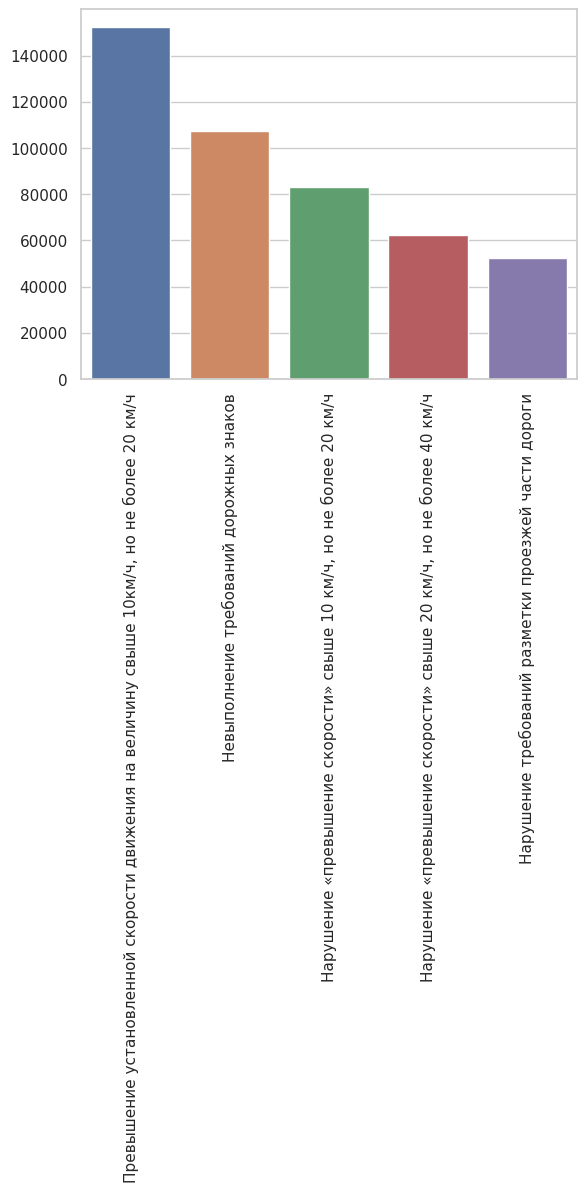

In [237]:
sns.barplot(x=violation_series.index[:5], y=violation_series.values[:5])
plt.xticks(rotation=90)
plt.show()

#### Статистика нарушений: лидеры среди марок и моделей автомобилей
#### Violation Statistics: Leading Car Makes and Models

##### Car Models

In [238]:
brand_model_data = []
for i, row in df.iterrows():
    brand = row['car_brand']
    model = row['car_model']
    brand_model = "{} {}".format(brand, model)
    brand_model_data.append(brand_model)

In [239]:
brand_model_counts = collections.Counter(brand_model_data)
most_common_models = sorted(brand_model_counts.items(), key=lambda x: x[1], reverse=True)[:10]
print("The 10 most common models of cars that violate traffic rules are:")
for brand, count in most_common_models:
    print("* {} ({})".format(brand, count))

The 10 most common models of cars that violate traffic rules are:
* HONDA FIT (26467)
* TOYOTA CAMRY (26301)
* HONDA ODYSSEY (16221)
* HONDA STEPWGN (14074)
* VOLKSWAGEN PASSAT (12574)
* HONDA CR-V (12060)
* LEXUS GX 470 (9850)
* LEXUS LX 570 (8167)
* LEXUS RX 300 (8047)
* HONDA ACCORD (7988)


In [240]:
top_models = [models for models, _ in most_common_models[:10]]
models_counts = [count for _, count in most_common_models[:10]]

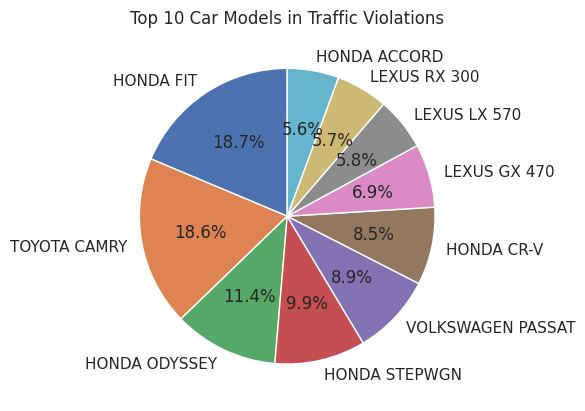

In [241]:
sns.set(style="whitegrid")
plt.pie(models_counts, labels=top_models, autopct='%1.1f%%', startangle=90)
plt.title("Top 10 Car Models in Traffic Violations")

plt.show()

##### Brands

In [251]:
brand_counts = collections.Counter(df["car_brand"])

In [252]:
most_common_brands = sorted(brand_counts.items(), key=lambda x: x[1], reverse=True)[:10]
top_brands = [brand for brand, count in most_common_brands]
brand_counts = [count for _, count in most_common_brands]

In [253]:
print("The 10 most common car brands in traffic violations are:")
for brand, count in most_common_brands:
    print("* {} ({})".format(brand, count))

The 10 most common car brands in traffic violations are:
* TOYOTA (126439)
* HONDA (99203)
* MERCEDES-BENZ (86335)
* LEXUS (50274)
* VOLKSWAGEN (33059)
* NISSAN (20101)
* MAZDA (20006)
* BMW (19840)
* SUBARU (18456)
* AUDI (17171)


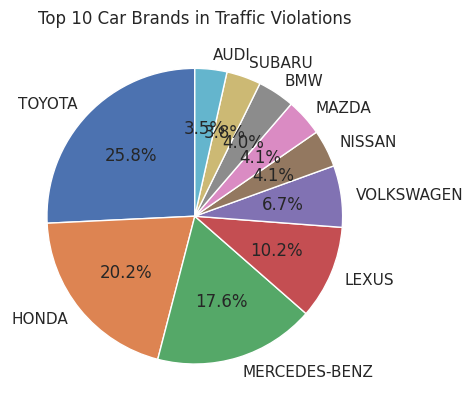

In [254]:
sns.set(style="whitegrid")
plt.pie(brand_counts, labels=top_brands, autopct='%1.1f%%', startangle=90)
plt.title("Top 10 Car Brands in Traffic Violations")
plt.show()

next

In [257]:
data = df.copy()
data['date'] = data['date'].str.strip()
data['date'] = data['date'].apply(lambda x: datetime.strptime(x, "%d/%m/%y"))
sorted_df = data.sort_values(by='date')

In [263]:
data['time'].unique()

array(['12:00 AM', '12:01 AM', '12:02 AM', ..., '7:41 PM', '5:06 AM',
       '6:29 AM'], dtype=object)